In [1]:
#Write a program to implemet following feature selection algorithms:
#A.Univariate Selection
#B.RFE
#C.PCA
#D.Feature Importance
#E.Correlation Matrix With Heatmap

#Univariate Selection:

from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
filename = "C:/Users/cse/Downloads/pima-indians-diabetes.csv"
names = ['preg','plas','pras','skin','test','mass','pedi','age','class']
dataframe = read_csv(filename,names=names)
array = dataframe.values


In [2]:
x = array[:,0:8]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [3]:
y = array[:,8]
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [4]:
test = SelectKBest(score_func=f_classif,k=4)
fit = test.fit(x,y)
set_printoptions(precision=3)

In [5]:
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [6]:
features = fit.transform(x)
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [7]:
#B.RFE:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs")
rfe = RFE(model,3)
fit = rfe.fit(x,y)

C:\Users\cse\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\cse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print("Num Features:" ,fit.n_features_)

Num Features: 3


In [9]:
print("Selected Features:",fit.support_)

Selected Features: [ True False False False False  True  True False]


In [10]:
print("Feature Ranking:",fit.ranking_)

Feature Ranking: [1 2 4 5 6 1 1 3]


In [11]:
#C.PCA:

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(x)

In [12]:
print("Explained Variance:%s" %fit.explained_variance_ratio_)

Explained Variance:[0.889 0.062 0.026]


In [13]:
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [14]:
#D.Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.109 0.242 0.1   0.073 0.075 0.141 0.12  0.139]


<AxesSubplot:>

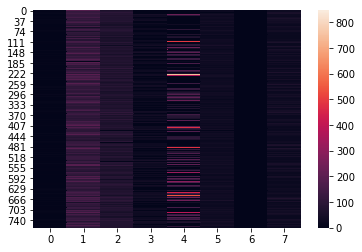

In [15]:
#E.Correlation Matrix With HeatMaps:
import seaborn as sns
sns.heatmap(x)